# Multinomial Classification (normal or DOS or PROBE or R2L or U2R)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import itertools
import seaborn as sns

import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [3]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [4]:
train=pd.read_csv('NSL_Dataset\Train.txt',sep=',')
test=pd.read_csv('NSL_Dataset\Test.txt',sep=',')

In [5]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 

In [7]:
len(columns)

43

In [8]:
train.columns=columns
test.columns=columns

In [9]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [10]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [14]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [15]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [16]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1.0


In [17]:
train.shape

(125972, 44)

### Basic Exploratory Analysis

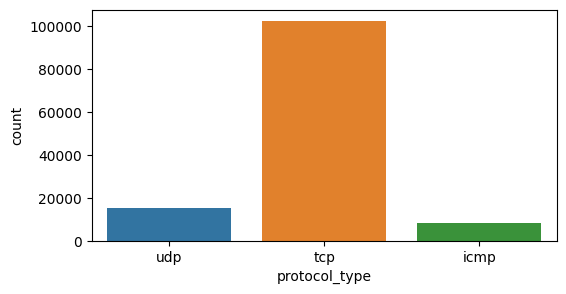

In [18]:
# Protocol type distribution
plt.figure(figsize=(6,3))
sns.countplot(x="protocol_type", data=train)
plt.show()

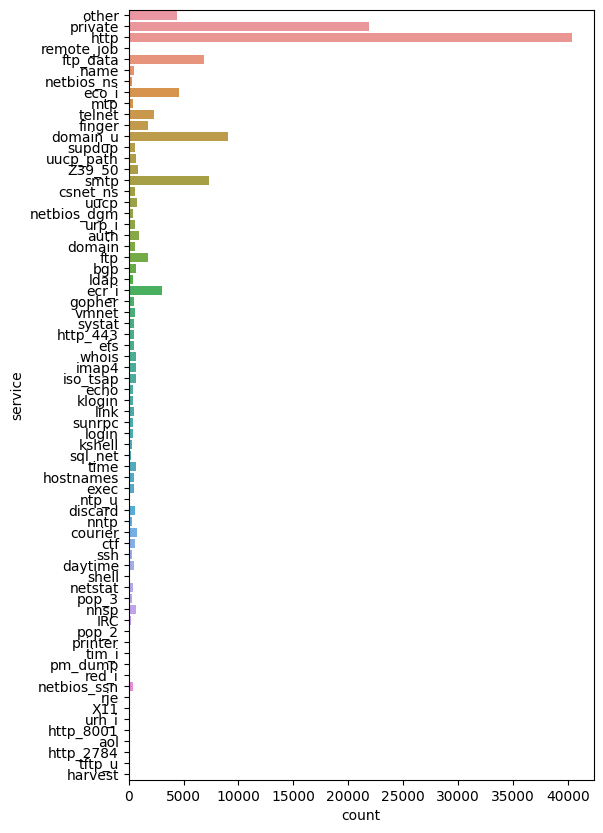

In [19]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

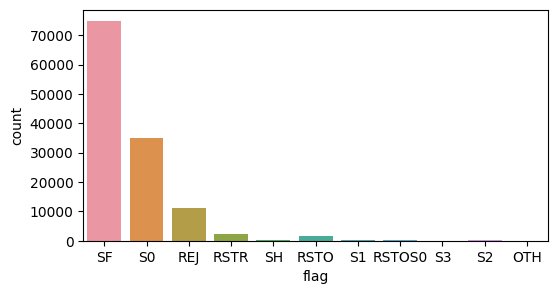

In [20]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()

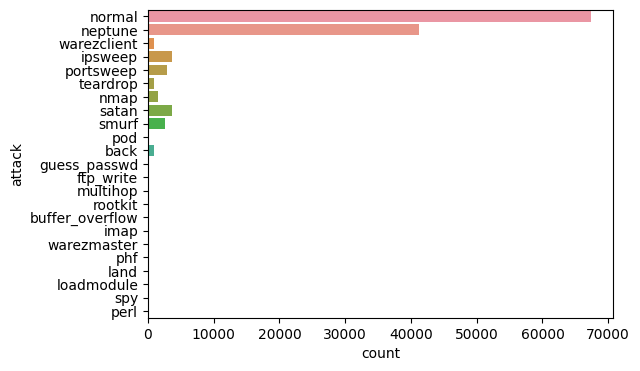

In [21]:
# attack distribution
plt.figure(figsize=(6,4))
sns.countplot(y="attack", data=train)
plt.show()

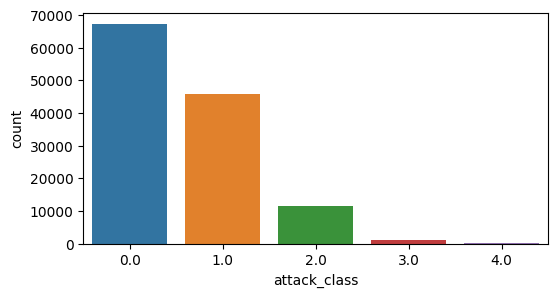

In [22]:
# attack class distribution
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.show()

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [23]:
train.groupby('attack_class').mean().T

C:\Users\KEERTHINATHAN\AppData\Local\Temp\ipykernel_12080\1593307576.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('attack_class').mean().T


attack_class,0.0,1.0,2.0,3.0,4.0
duration,168.589899,0.006227,2074.858185,633.417085,80.942308
src_bytes,13133.467064,1176.321162,385679.838367,307727.300503,906.230769
dst_bytes,4329.749517,169.201537,181074.911805,81822.026131,5141.961538
land,0.000104,0.000392,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015,0.019231
hot,0.230658,0.039889,0.001630,8.334673,1.403846
num_failed_logins,0.001381,0.000000,0.000343,0.056281,0.019231
logged_in,0.710656,0.020837,0.007121,0.913568,0.884615
num_compromised,0.507083,0.019226,0.000601,0.077387,1.211538


##### Observations:
- The length of time duration of connection for attack is higher than  normal.
- Wrong fragments in the connection is only present in attack.
- Number of outbound commands in an ftp session  are 0 in both normal and attack.

In [24]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [25]:
numeric_var_names

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'last_flag',
 'attack_class']

In [26]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack']

In [27]:
train_num=train[numeric_var_names]
test_num=test[numeric_var_names]
train_num.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1.0
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0.0
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1.0


In [28]:
train_cat=train[cat_var_names]
test_cat=test[cat_var_names]
train_cat.head(5)

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


### Data Audit Report

In [29]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [30]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,3.617247e+07,287.146929,0.00,2.604526e+03,6.783553e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.58,4.290800e+04
src_bytes,125972.0,0.0,5.740179e+09,45567.100824,44.00,5.870354e+06,3.446106e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125972.0,0.0,2.491634e+09,19779.271433,0.00,4.021285e+06,1.617073e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.00,1.309937e+09
land,125972.0,0.0,2.500000e+01,0.000198,0.00,1.408613e-02,1.984190e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.0,2.858000e+03,0.022688,0.00,2.535310e-01,6.427796e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.0,1.400000e+01,0.000111,0.00,1.436608e-02,2.063844e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.0,2.575000e+04,0.204411,0.00,2.149977e+00,4.622401e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125972.0,0.0,1.540000e+02,0.001222,0.00,4.523932e-02,2.046596e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.0,4.985200e+04,0.395739,0.00,4.890107e-01,2.391315e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125972.0,0.0,3.517800e+04,0.279253,0.00,2.394214e+01,5.732259e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [31]:
num_summary.to_csv('num_summary.csv')

### Handling Outlier

In [32]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num=train_num.apply(outlier_capping)

#### No missing in train dataset . So , Missing treatment not required .

In [33]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(cat_summary)

In [34]:
cat_summary

,protocol_type,service,flag,attack
N,125972,125972,125972,125972
NMISS,0,0,0,0
ColumnsNames,tcp 102688 udp 14993 icmp 8291 N...,http 40338 private 21853 domain_u...,SF 74944 S0 34851 REJ 1123...,normal 67342 neptune 41...


### Dummy Variable Creation

In [35]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [36]:
#for c_feature in categorical_features
for c_feature in ['protocol_type', 'service', 'flag', 'attack']:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)
train_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Final file for analysis

In [37]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0.0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# correlation matrix (ranges from 1 to -1)
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.011740,0.036892,NaN,NaN,NaN,0.021274,NaN,-0.064538,0.062081,...,-0.000757,-0.005534,0.408874,-0.000414,-0.023837,-0.020279,0.000605,-0.011691,0.037013,-0.001571
src_bytes,0.011740,1.000000,0.127827,NaN,NaN,NaN,0.379973,NaN,0.163275,0.603363,...,-0.000898,0.002845,-0.022114,-0.001067,-0.028784,-0.002928,-0.000555,-0.013779,0.047995,-0.002012
dst_bytes,0.036892,0.127827,1.000000,NaN,NaN,NaN,0.127002,NaN,0.421999,0.237363,...,0.010050,-0.014104,-0.053377,0.006873,-0.060374,-0.051676,-0.000156,-0.029791,-0.011541,0.064962
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.020279,-0.002928,-0.051676,NaN,NaN,NaN,-0.020616,NaN,-0.118539,-0.014876,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025242,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.000605,-0.000555,-0.000156,NaN,NaN,NaN,-0.000561,NaN,0.000850,-0.000405,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.011691,-0.013779,-0.029791,NaN,NaN,NaN,-0.011886,NaN,-0.068341,-0.008576,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014553,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.037013,0.047995,-0.011541,NaN,NaN,NaN,0.270177,NaN,0.104233,-0.008567,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


In [39]:
corrm.to_csv('corrm.csv')

<Axes: >

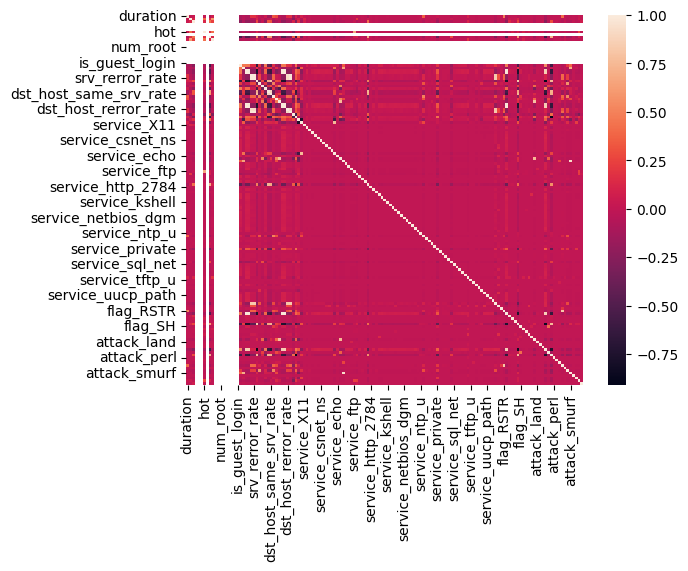

In [40]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

#### Dropping columns based on data audit report
        - Based on low variance (near zero variance)
        - High missings (>25% missings)
        - High correlations between two numerical variables

In [41]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

<Axes: >

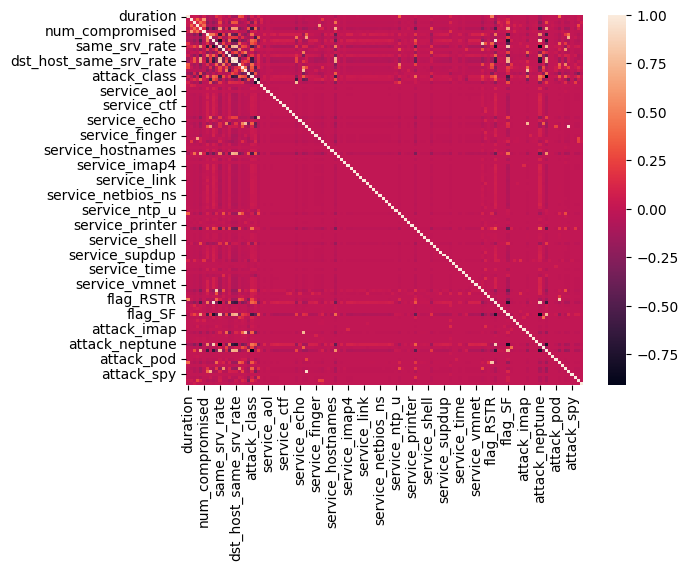

In [42]:
sns.heatmap(train_new.corr())

#### Variable reduction using Select K-Best technique

In [43]:
X = train_new[train_new.columns.difference(['attack_class'])]
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['attack_class'] )

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [44]:
X_new.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [45]:
X_new.scores_

array([1.34064116e+02, 3.56884766e+01, 2.37277235e+02, 4.90832543e+01,
       2.23882592e+04, 1.56916475e+01, 4.01526990e+01, 3.12249574e+01,
       3.49978365e+05, 7.54266680e+03,            inf, 1.33779097e+01,
       1.78386176e+01, 1.75924658e+02, 1.69864681e+04, 4.46176249e+01,
       2.26844805e+04, 2.44673212e+03, 8.91790430e+00, 7.92699452e+02,
       4.26678275e+03, 8.93056079e+01, 4.22698233e+04, 7.97231867e+03,
       5.76300314e+03, 1.85803691e+04, 2.24895262e+04, 2.75241067e+04,
       6.70321129e+04, 6.92428333e+04, 1.83320102e+04, 2.42923569e+03,
       2.92634050e+03, 6.10523702e+02, 4.62953538e+02, 1.01592004e+04,
       1.10260381e+05, 1.52322078e+02, 4.14807873e+01, 1.57821049e+01,
       1.10776633e+05, 1.21395725e+03, 1.29054963e+02, 3.23685410e+04,
       5.75770350e+04, 2.97251093e+02, 5.23057641e+03, 3.77796192e+03,
       8.06829774e+03, 1.33879527e+05, 1.02833658e+05, 2.34824947e+01,
       7.35338278e+02, 8.91790430e+00, 2.91628764e+02, 5.98590866e+02,
      

In [46]:
# capturing the important variables
KBest_features=X.columns[X_new.get_support()]
KBest_features

Index(['attack_neptune', 'attack_normal', 'attack_satan', 'count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')

### Final list of variable selected for the model building using Select KBest

attack_neptune, attack_normal, attack_satan, count, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_same_srv_rate, dst_host_srv_count, flag_S0, flag_SF, last_flag, logged_in, same_srv_rate, serror_rate, service_http

In [47]:
train=train_new
test=test_new

## Model Building

In [48]:
top_features=['attack_neptune','attack_normal','attack_satan','count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_same_srv_rate','dst_host_srv_count','flag_S0','flag_SF','last_flag','logged_in','same_srv_rate','serror_rate','service_http']
X_train = train[top_features]
y_train = train['attack_class']
X_test = test[top_features]
y_test = test['attack_class']

### Building logistic Regression

#### 1) LogisticRegression

In [49]:
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_pred=lr_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8376879740939538

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1 score for logistic regression model
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr = f1_score(y_test, y_pred, average='weighted')

print("Precision (Logistic Regression):", precision_lr)
print("Recall (Logistic Regression):", recall_lr)
print("F1 Score (Logistic Regression):", f1_lr)

Precision (Logistic Regression): 0.7437568537011908
Recall (Logistic Regression): 0.8376879740939538
F1 Score (Logistic Regression): 0.7844890249017165


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 2) RidgeClassifier

In [53]:
from sklearn.linear_model import RidgeClassifier

In [54]:
rc_clf = RidgeClassifier().fit(X_train, y_train)

In [55]:
y_pred=rc_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 2., 0., 2.])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7605021514439072

In [57]:
precision_rc = precision_score(y_test, y_pred, average='weighted')
recall_rc = recall_score(y_test, y_pred, average='weighted')
f1_rc = f1_score(y_test, y_pred, average='weighted')

print("Precision (RidgeClassifier):", precision_rc)
print("Recall (RidgeClassifier):", recall_rc)
print("F1 Score (RidgeClassifier):", f1_rc)

Precision (RidgeClassifier): 0.7945671765066148
Recall (RidgeClassifier): 0.7605021514439072
F1 Score (RidgeClassifier): 0.7474741913069197


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### K-Nearest Neighbors

#### 1) KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
k_neigh = KNeighborsClassifier(n_neighbors=3)
k_neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred=k_neigh.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 0.])

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.753981280220024

In [62]:
# Calculate precision, recall, and F1 score for KNN classifier
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')

print("Precision (KNN):", precision_knn)
print("Recall (KNN):", recall_knn)
print("F1 Score (KNN):", f1_knn)

Precision (KNN): 0.680032170621915
Recall (KNN): 0.753981280220024
F1 Score (KNN): 0.7112770336201176


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 3) NearestCentroid

In [63]:
from sklearn.neighbors import NearestCentroid


In [64]:
nc = NearestCentroid()
nc.fit(X_train, y_train)

NearestCentroid()

In [65]:
y_pred=nc.predict(X_test)
y_pred

array([1., 2., 2., ..., 0., 0., 2.])

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6059087078028657

In [67]:
# Calculate precision, recall, and F1 score for NearestCentroid classifier
precision_nc = precision_score(y_test, y_pred, average='weighted')
recall_nc = recall_score(y_test, y_pred, average='weighted')
f1_nc = f1_score(y_test, y_pred, average='weighted')

print("Precision (NearestCentroid):", precision_nc)
print("Recall (NearestCentroid):", recall_nc)
print("F1 Score (NearestCentroid):", f1_nc)

Precision (NearestCentroid): 0.5826403834021359
Recall (NearestCentroid): 0.6059087078028657
F1 Score (NearestCentroid): 0.5769690359538596


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Discriminant Analysis

#### 1) LinearDiscriminantAnalysis

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [69]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) 

LinearDiscriminantAnalysis()

In [70]:
y_pred=lda.predict(X_test)
y_pred

array([1., 0., 2., ..., 0., 0., 2.])

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7071374706117198

In [72]:
# Calculate precision, recall, and F1 score for NearestCentroid classifier
precision_nc = precision_score(y_test, y_pred, average='weighted')
recall_nc = recall_score(y_test, y_pred, average='weighted')
f1_nc = f1_score(y_test, y_pred, average='weighted')

print("LinearDiscriminant Precision:", precision_nc)
print("Recall (LinearDiscriminant):", recall_nc)
print("F1 Score (LinearDiscriminant):", f1_nc)

LinearDiscriminant Precision: 0.6656631096664065
Recall (LinearDiscriminant): 0.7071374706117198
F1 Score (LinearDiscriminant): 0.6659640219248559


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 2) QuadraticDiscriminantAnalysis

In [73]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [74]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [75]:
y_pred=qda.predict(X_test)
y_pred

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([0., 0., 0., ..., 0., 0., 0.])

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4307767377900013

In [77]:
# Calculate precision, recall, and F1 score for NearestCentroid classifier
precision_nc = precision_score(y_test, y_pred, average='weighted')
recall_nc = recall_score(y_test, y_pred, average='weighted')
f1_nc = f1_score(y_test, y_pred, average='weighted')

print("Precision (QuadraticDiscriminant):", precision_nc)
print("Recall (QuadraticDiscriminant):", recall_nc)
print("F1 Score (QuadraticDiscriminant):", f1_nc)

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision (QuadraticDiscriminant): 0.18556859782099558
Recall (QuadraticDiscriminant): 0.4307767377900013
F1 Score (QuadraticDiscriminant): 0.2593956036881443


### Decision Trees

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

from sklearn.model_selection import GridSearchCV

In [79]:
clf_tree = DecisionTreeClassifier( max_depth = 5)
clf_tree=clf_tree.fit( X_train, y_train )

In [80]:
y_pred=qda.predict(X_test)
y_pred

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4307767377900013

In [82]:
# Calculate precision, recall, and F1 score for NearestCentroid classifier
precision_nc = precision_score(y_test, y_pred, average='weighted')
recall_nc = recall_score(y_test, y_pred, average='weighted')
f1_nc = f1_score(y_test, y_pred, average='weighted')

print("Precision (Decision):", precision_nc)
print("Recall (Decision):", recall_nc)
print("F1 Score (Decision):", f1_nc)

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision (Decision): 0.18556859782099558
Recall (Decision): 0.4307767377900013
F1 Score (Decision): 0.2593956036881443


#### Fine Tuning the parameters

In [83]:
param_grid = {'max_depth': np.arange(3, 9),
             'max_features': np.arange(3,9)}

In [84]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'max_features': array([3, 4, 5, 6, 7, 8])})

In [85]:
tree.best_score_

0.9981662543158049

In [86]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=8)

In [87]:
tree.best_params_

{'max_depth': 7, 'max_features': 8}

### Building Final Decision Tree Model

In [88]:
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=8 )
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=8, max_features=8)

#### Feature Relative Importance

In [89]:
clf_tree.feature_importances_

array([1.81698626e-01, 7.25970087e-01, 3.24511977e-03, 2.62497029e-02,
       4.64219259e-03, 1.37254349e-03, 3.77741770e-02, 1.00129825e-03,
       2.11165527e-04, 8.46955788e-05, 1.04151336e-03, 0.00000000e+00,
       7.71387400e-03, 2.11377775e-03, 6.88122701e-03])

In [90]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map

[('attack_neptune', 0.18169862558752015),
 ('attack_normal', 0.7259700872241087),
 ('attack_satan', 0.003245119767699859),
 ('count', 0.02624970291844907),
 ('dst_host_diff_srv_rate', 0.004642192590302379),
 ('dst_host_same_src_port_rate', 0.0013725434923203422),
 ('dst_host_same_srv_rate', 0.03777417695124144),
 ('dst_host_srv_count', 0.001001298248090774),
 ('flag_S0', 0.00021116552672771565),
 ('flag_SF', 8.469557875953075e-05),
 ('last_flag', 0.001041513356141284),
 ('logged_in', 0.0),
 ('same_srv_rate', 0.007713873996742264),
 ('serror_rate', 0.0021137777514631155),
 ('service_http', 0.006881227010433276)]

In [91]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
1,attack_normal,0.725970
0,attack_neptune,0.181699
6,dst_host_same_srv_rate,0.037774
3,count,0.026250
12,same_srv_rate,0.007714
14,service_http,0.006881
4,dst_host_diff_srv_rate,0.004642
2,attack_satan,0.003245
13,serror_rate,0.002114
5,dst_host_same_src_port_rate,0.001373


In [92]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [93]:
tree_test_pred.sample( n = 10 )

,actual,predicted
13448,0.0,0.0
21214,1.0,2.0
17137,3.0,2.0
15380,0.0,0.0
1963,0.0,0.0
18722,0.0,0.0
17318,0.0,0.0
21195,0.0,0.0
13457,3.0,2.0
3810,1.0,1.0


In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Make predictions on the test data using the Decision Tree classifier
y_pred_tree = clf_tree.predict(X_test)

# Calculate precision, recall, and F1 score for the Decision Tree classifier
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print("Precision (Decision Tree):", precision_tree)
print("Recall (Decision Tree):", recall_tree)
print("F1 Score (Decision Tree):", f1_tree)

# Calculate accuracy score for the Decision Tree classifier
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Score (Decision Tree):", accuracy_tree)

# Display feature importance
importances = clf_tree.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importance:")
print(feature_importance_df)

# Sample predictions and actual values for comparison
tree_test_pred_sample = tree_test_pred.sample(n=10)
print("\nSample Predictions vs Actual:")
print(tree_test_pred_sample)


Precision (Decision Tree): 0.7651803195001379
Recall (Decision Tree): 0.8006920108237591
F1 Score (Decision Tree): 0.7720063737558084
Accuracy Score (Decision Tree): 0.8006920108237591
Feature Importance:
                        Feature  Importance
1                 attack_normal    0.725970
0                attack_neptune    0.181699
6        dst_host_same_srv_rate    0.037774
3                         count    0.026250
12                same_srv_rate    0.007714
14                 service_http    0.006881
4        dst_host_diff_srv_rate    0.004642
2                  attack_satan    0.003245
13                  serror_rate    0.002114
5   dst_host_same_src_port_rate    0.001373
10                    last_flag    0.001042
7            dst_host_srv_count    0.001001
8                       flag_S0    0.000211
9                       flag_SF    0.000085
11                    logged_in    0.000000

Sample Predictions vs Actual:
       actual  predicted
19803     1.0        1.0
21507     

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 23.52222222222222, 'Predicted label')

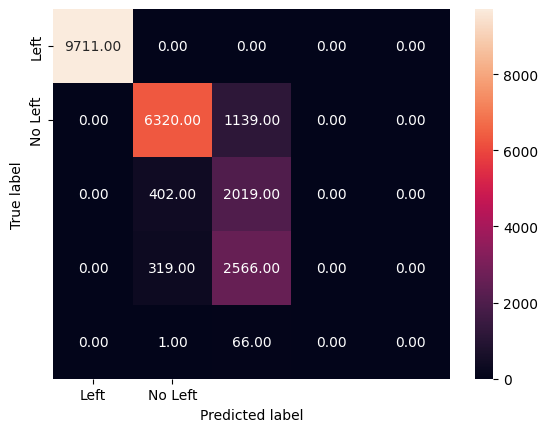

In [95]:
tree_cm = metrics.confusion_matrix(tree_test_pred.actual, tree_test_pred.predicted)
sns.heatmap(tree_cm, annot=True,
            fmt='.2f',
            xticklabels=["Left", "No Left"], yticklabels=["Left", "No Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')


## Naive Bayes Model

#### 1) BernoulliNB

In [96]:
from sklearn.naive_bayes import BernoulliNB

In [97]:
bnb_clf = BernoulliNB()
bnb_clf.fit(X_train, y_train)

BernoulliNB()

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision (Bernoulli Naive Bayes): 0.7796578630902596
Recall (Bernoulli Naive Bayes): 0.778379097724349
F1 Score (Bernoulli Naive Bayes): 0.7593096213253662
Accuracy Score (Bernoulli Naive Bayes): 0.778379097724349


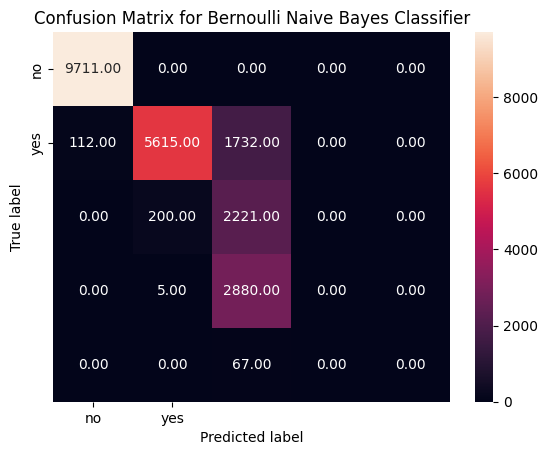

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data using the Bernoulli Naive Bayes classifier
y_pred_nb = bnb_clf.predict(X_test)

# Calculate precision, recall, and F1 score for the Bernoulli Naive Bayes classifier
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print("Precision (Bernoulli Naive Bayes):", precision_nb)
print("Recall (Bernoulli Naive Bayes):", recall_nb)
print("F1 Score (Bernoulli Naive Bayes):", f1_nb)

# Calculate accuracy score for the Bernoulli Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy Score (Bernoulli Naive Bayes):", accuracy_nb)

# Generate confusion matrix and visualize it using seaborn
nb_cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(nb_cm, annot=True, fmt='.2f', xticklabels=["no", "yes"], yticklabels=["no", "yes"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier')
plt.show()


#### 2) GaussianNB

In [99]:
from sklearn.naive_bayes import GaussianNB

In [100]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [101]:
y_pred=gnb_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

Text(0.5, 23.52222222222222, 'Predicted label')

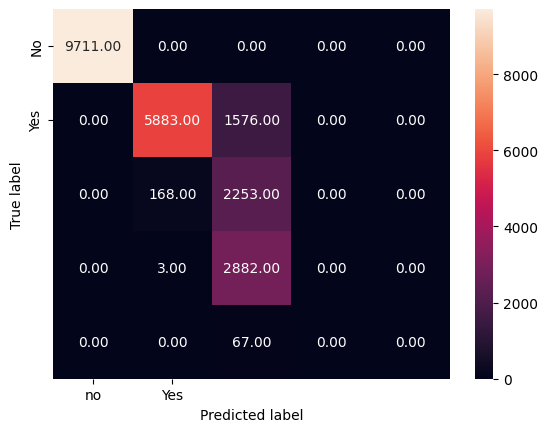

In [102]:
nb_cm = metrics.confusion_matrix( y_test, y_pred )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [103]:
accuracy_score( y_test, y_pred )

0.7916869981812537

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision (Gaussian Naive Bayes): 0.7880074744380087
Recall (Gaussian Naive Bayes): 0.7916869981812537
F1 Score (Gaussian Naive Bayes): 0.7714843344192903
Accuracy Score (Gaussian Naive Bayes): 0.7916869981812537


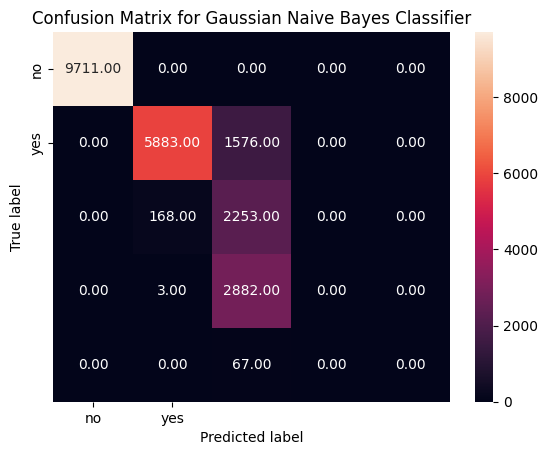

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data using the Gaussian Naive Bayes classifier
y_pred_gnb = gnb_clf.predict(X_test)

# Calculate precision, recall, and F1 score for the Gaussian Naive Bayes classifier
precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')
recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')

print("Precision (Gaussian Naive Bayes):", precision_gnb)
print("Recall (Gaussian Naive Bayes):", recall_gnb)
print("F1 Score (Gaussian Naive Bayes):", f1_gnb)

# Calculate accuracy score for the Gaussian Naive Bayes classifier
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy Score (Gaussian Naive Bayes):", accuracy_gnb)

# Generate confusion matrix and visualize it using seaborn
gnb_cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(gnb_cm, annot=True, fmt='.2f', xticklabels=["no", "yes"], yticklabels=["no", "yes"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()


### Support Vector Machine (SVM)

#### 1) LinearSVC

In [105]:
from sklearn.svm import LinearSVC

In [106]:
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X_train, y_train)

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [107]:
y_pred=svm_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [108]:
accuracy_score( y_test, y_pred )

0.7959011666592734

In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Make predictions on the test data using the Linear Support Vector Classifier (LinearSVC)
y_pred_svm = svm_clf.predict(X_test)

# Calculate precision, recall, and F1 score for the Linear Support Vector Classifier (LinearSVC)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Precision (LinearSVC):", precision_svm)
print("Recall (LinearSVC):", recall_svm)
print("F1 Score (LinearSVC):", f1_svm)

# Calculate accuracy score for the Linear Support Vector Classifier (LinearSVC)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy Score (LinearSVC):", accuracy_svm)


Precision (LinearSVC): 0.7377902135714596
Recall (LinearSVC): 0.7959011666592734
F1 Score (LinearSVC): 0.7589288436383982
Accuracy Score (LinearSVC): 0.7959011666592734


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 2) SVC

In [110]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

In [111]:
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [112]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 2., 0., 2.])

In [113]:
accuracy_score( y_test, y_pred )

0.7109524020760325

In [114]:
# Make predictions on the test data using the Support Vector Classifier (SVC)
y_pred_svc = model.predict(X_test)

# Calculate precision, recall, and F1 score for the Support Vector Classifier (SVC)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted', zero_division=1)

recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

print(precision_svc)
print(recall_svc)
print(f1_svc)

0.8358840773063699
0.7109524020760325
0.6857926631398522


### Stochastic Gradient Descent (SGD)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [116]:
model = SGDClassifier(loss="hinge", penalty="l2")
model.fit(X_train, y_train)

SGDClassifier()

In [117]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 0., 0., 2.])

In [118]:
accuracy_score( y_test, y_pred )

0.7388989930355321

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration re

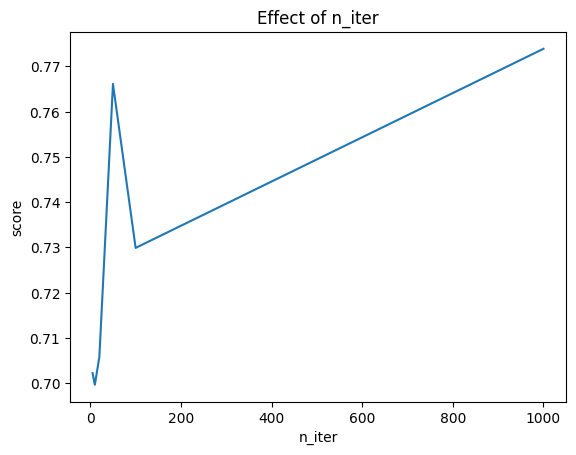

In [119]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

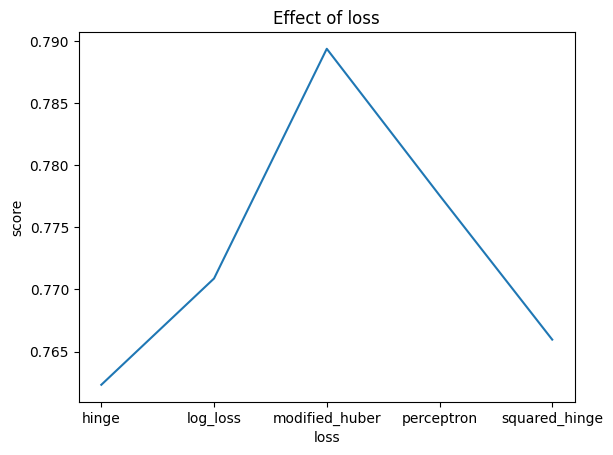

In [120]:
# losses
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np

losses = ["hinge", "log_loss", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.xlabel("loss")
plt.ylabel("score")
plt.title("Effect of loss")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores)
plt.show()


In [121]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=100)
clf = GridSearchCV(model, param_grid=params)

In [122]:
clf.fit(X_train, y_train)
print(clf.best_score_)

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration re

0.9881640464045445


In [123]:
y_pred=clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 1.])

In [124]:
accuracy_score( y_test, y_pred )

0.8153307013263541

In [125]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Define the SGDClassifier model with default parameters
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
model.fit(X_train, y_train)

# Make predictions on the test data using the SGD Classifier
y_pred = model.predict(X_test)

# Calculate precision, recall, and F1 score for the SGD Classifier
precision_sgd = precision_score(y_test, y_pred, average='weighted')
recall_sgd = recall_score(y_test, y_pred, average='weighted')
f1_sgd = f1_score(y_test, y_pred, average='weighted')

print("Precision (SGDClassifier):", precision_sgd)
print("Recall (SGDClassifier):", recall_sgd)
print("F1 Score (SGDClassifier):", f1_sgd)

# Perform parameter tuning using GridSearchCV
params = {
    "loss": ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"],
    "alpha": [0.0001, 0.001, 0.01, 0.1],
    "penalty": ["l1", "l2", "elasticnet"],
}

# Initialize GridSearchCV with the SGD Classifier model and parameter grid
clf = GridSearchCV(SGDClassifier(max_iter=1000), param_grid=params, cv=5)

# Fit the GridSearchCV to the training data
clf.fit(X_train, y_train)

# Print the best score from GridSearchCV
print("Best Score (SGDClassifier):", clf.best_score_)

# Make predictions using the best estimator from GridSearchCV
y_pred_tuned = clf.best_estimator_.predict(X_test)

# Calculate precision, recall, and F1 score for the tuned SGD Classifier
precision_sgd_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_sgd_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_sgd_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("Precision (Tuned SGDClassifier):", precision_sgd_tuned)
print("Recall (Tuned SGDClassifier):", recall_sgd_tuned)
print("F1 Score (Tuned SGDClassifier):", f1_sgd_tuned)


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision (SGDClassifier): 0.7042838019192783
Recall (SGDClassifier): 0.7769595883422792
F1 Score (SGDClassifier): 0.7312220251306256


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
----------------------------------------------------

Best Score (SGDClassifier): 0.9885212626580545
Precision (Tuned SGDClassifier): 0.7150741493704571
Recall (Tuned SGDClassifier): 0.8112939715210931
F1 Score (Tuned SGDClassifier): 0.7572452824900555


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Neural Network Model

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [127]:
# Now apply the transformations to the data:
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

In [128]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [129]:
y_pred=mlp.predict(test_X)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [130]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[9711    0    0    0    0]
 [   0 6769  690    0    0]
 [   0  346 2075    0    0]
 [   0  333 2552    0    0]
 [   0    0   67    0    0]]


In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9711
         1.0       0.91      0.91      0.91      7459
         2.0       0.39      0.86      0.53      2421
         3.0       0.00      0.00      0.00      2885
         4.0       0.00      0.00      0.00        67

    accuracy                           0.82     22543
   macro avg       0.46      0.55      0.49     22543
weighted avg       0.77      0.82      0.79     22543



c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [132]:
mlp.coefs_

[array([[ 8.24998224e-02, -3.12364832e-01,  2.82412184e-01,
          1.49345762e-01, -6.28500774e-02, -1.64293470e-01,
          4.83219105e-01,  1.37100049e-01,  1.73354184e-02,
         -2.23534402e-01, -2.11064094e-01,  5.32278383e-01,
          3.74127040e-01, -5.33186202e-01, -9.59530183e-03,
         -7.98023112e-02, -4.36254788e-01, -4.28677569e-01,
          3.56614747e-01,  6.91568919e-02,  7.48596672e-02,
          1.76407682e-01,  2.80734846e-01, -1.22836970e-01,
          1.92614529e-01, -2.40614858e-01, -2.94555023e-01,
          6.01484348e-01, -3.12194732e-01, -1.48307715e-01],
        [ 3.98904936e-01,  2.20933936e-01,  5.32525886e-01,
          1.29784842e-01, -5.78445504e-01,  1.48309541e-01,
         -5.02642620e-01, -1.61750926e-01,  1.87135505e-01,
          8.52571696e-01,  9.18464983e-02, -3.96189005e-01,
         -2.56016981e-01,  4.88835380e-01, -1.79160223e-01,
          1.01938490e+00,  7.84709782e-02, -1.63370530e-02,
          5.27536210e-02,  2.18480983e-

In [133]:
accuracy_score( y_test, y_pred )

0.8230936432595484

## Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

Bagging-> Building multiple models (typically of the same type) from different subsamples of the training dataset.

Boosting-> Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

Voting-> Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

### Bagging Algorithms

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

1) Bagged Decision Trees

2) Random Forest

3) Extra Trees

#### 1. Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

In [134]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [135]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())


0.9993887515433026


In [136]:
model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [137]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [138]:
accuracy_score( y_test, y_pred )

0.8117375682029898

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision with weighted average
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Accuracy: 0.8117375682029898
Precision: 0.7714846570544702
Recall: 0.8117375682029898
F1 Score: 0.7793345062800815


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 2. Random Forest
Random forest is an extension of bagged decision trees.

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 100
max_features = 3

# Set shuffle=True or remove random_state argument
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())


0.999539577955239


In [142]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [143]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [144]:
accuracy_score( y_test, y_pred )

0.8273965310739476

In [145]:

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Precision: 0.7767574223932427
Recall: 0.8273965310739476
F1 Score: 0.7912233811429387


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 3. Extra Trees
Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

In [146]:
from sklearn.ensemble import ExtraTreesClassifier

In [147]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

seed = 7
num_trees = 100
max_features = 7

# Set shuffle=True or remove random_state argument
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())


0.9995078268836401


In [148]:
model.fit(X_train, y_train)

ExtraTreesClassifier(max_features=7)

In [149]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [150]:
accuracy_score( y_test, y_pred )

0.8146209466353191

In [151]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Accuracy: 0.8146209466353191
Precision: 0.7747383190708231
Recall: 0.8146209466353191
F1 Score: 0.7824575562121587


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1) AdaBoost

2) Stochastic Gradient Boosting

#### 1. AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [153]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10,  shuffle=True,random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAM

0.9983408924551481


In [154]:
model.fit(X_train, y_train)

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=30, random_state=7)

In [155]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 1.])

In [156]:
accuracy_score( y_test, y_pred )

0.8369782194029188

In [157]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Accuracy: 0.8369782194029188
Precision: 0.7537511593078005
Recall: 0.8369782194029188
F1 Score: 0.7891323850186239


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 2. Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

In [158]:
from sklearn.ensemble import GradientBoostingClassifier

In [159]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9990394645504527


In [160]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=7)

In [161]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 1.])

In [162]:
accuracy_score( y_test, y_pred )

0.8126691212349731

In [163]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Accuracy: 0.8126691212349731
Precision: 0.765169116719141
Recall: 0.8126691212349731
F1 Score: 0.7792458310435996


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

In [164]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [165]:
seed = 7
kfold = model_selection.KFold(n_splits=10,  shuffle=True,random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
ensemble.fit(X_train, y_train)

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [ ]:
y_pred=ensemble.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [ ]:
accuracy_score( y_test, y_pred )

0.8041964246107439

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

Accuracy: 0.8041964246107439
Precision: 0.7308560610730618
Recall: 0.8041964246107439
F1 Score: 0.7577471691237768


c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Save Model

In [ ]:
import pickle
# Saving model to disk of random forest
pickle.dump(lr_clf, open('model.pkl','wb'))

# Load Model and Predict

In [ ]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[1,0,0,229,0.06,0.00,0.04,10,0,0,21,0,0.04,0.00,0]])

c:\Users\KEERTHINATHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])